## Library Import

In [ ]:
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import lag_plot
from IPython.display import display,Markdown
import plotly
import plotly.graph_objects as go
import numpy as np
import warnings
warnings.simplefilter('ignore')

import fbprophet
from fbprophet import Prophet

buttons_to_remove = ['zoom2d','zoomIn2d','zoomOut2d','toImage',
                     'sendDataToCloud',
                     'editInChartStudio',
                     'select2d',
                     'lasso2d',]

scatter_config = {'displayModeBar': 'Always',
                 "displaylogo": False,
                 'modeBarButtons': 'toggleHover ',
                 'modeBarButtonsToRemove': buttons_to_remove,}


In [ ]:
df_cpi = pd.read_excel('CPIRawData.xlsx',engine='openpyxl',sheet_name = 'BLS Data Series',skiprows=11)
df_cpi['RollingAvg5Yr'] = df_cpi.Annual.rolling(5).mean()
df_cpi['RollingSD5Yr'] = df_cpi.Annual.rolling(5).std()

df_cpi['RollingAvg5Yr_low'] = df_cpi.Annual.rolling(5).min()
df_cpi['RollingAvg5Yr_high'] = df_cpi.Annual.rolling(5).max()

#df_cpi['RollingAvg5Yr_low'] = df_cpi['RollingAvg5Yr'] - df_cpi['RollingSD5Yr']
#df_cpi['RollingAvg5Yr_high'] = df_cpi['RollingAvg5Yr'] + df_cpi['RollingSD5Yr']


df_cpi['inflation'] = (df_cpi.Annual.diff()/ df_cpi['Annual'].shift(1))*100

df_cpi.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,...,Nov,Dec,Annual,HALF1,HALF2,RollingAvg5Yr,RollingSD5Yr,RollingAvg5Yr_low,RollingAvg5Yr_high,inflation
0,1913.0,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,...,10.1,10.0,9.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1914.0,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,...,10.2,10.1,10.0,NaN,NaN,NaN,NaN,NaN,NaN,1.010101
2,1915.0,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,...,10.3,10.3,10.1,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
3,1916.0,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,...,11.5,11.6,10.9,NaN,NaN,NaN,NaN,NaN,NaN,7.920792
4,1917.0,11.7,12.0,12.0,12.6,12.8,13.0,12.8,13.0,13.3,...,13.5,13.7,12.8,NaN,NaN,10.74,1.217785,9.9,12.8,17.431193


In [ ]:
fig = go.Figure()

y = df_cpi['inflation']
x = df_cpi['Year']


fig.add_trace(go.Scatter(x=x, y=y,
                         marker=dict(color='#005100',size = 5),
                         line = dict(color='#005100',width = 1),
                         mode='markers+lines',
                         name='Yearly CPI'))

fig.update_xaxes(tickangle=-45, tickfont = dict(family = 'Arial', size = 14,color = 'black'))
fig.update_layout(hovermode="x unified",clickmode ='select',height=500,width=1100,)

fig.show(config=scatter_config)


In [ ]:
fig = go.Figure()

y = df_cpi['Annual']
x = df_cpi['Year']
y_roll = df_cpi['RollingAvg5Yr']
y_rollmin = df_cpi['RollingAvg5Yr_low']
y_rollmax = df_cpi['RollingAvg5Yr_high']

fig.add_trace(go.Scatter(x=x, y=y,
                         marker=dict(color='#005100',size = 5),
                         line = dict(color='#005100',width = 1),
                         mode='markers+lines',
                         name='Yearly CPI'))

fig.add_trace(go.Scatter(x=x, y=y_roll,
                         line = dict(color='#FF3333',width = 1),
                         mode='lines',
                         name='5 Year Rolling Avg'))

fig.add_trace(go.Scatter(x=x, y=y_rollmin,
                         line = dict(color='#bf9fa2',width = 1),
                         mode='lines',
                         name='5 Year Rolling Low'))

fig.add_trace(go.Scatter(x=x, y=y_rollmax,
                         line = dict(color='#bf9fa2',width = 1),
                         mode='lines',
                         fill='tonexty',
                         name='5 Year Rolling High'))

fig.update_xaxes(tickangle=-45, tickfont = dict(family = 'Arial', size = 14,color = 'black'))
fig.update_layout(hovermode="x unified",clickmode ='select',height=500,width=1100,)

fig.show(config=scatter_config)


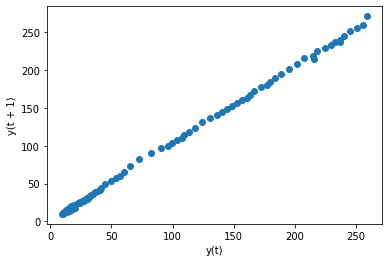

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


'Model change points data'

array([0.02775876, 0.0647958 , 0.09257992, 0.12961695, 0.15740107,
       0.19443811, 0.22222222, 0.25925926, 0.28701802, 0.31480214,
       0.35183918, 0.37962329, 0.41666033, 0.44444444, 0.48148148,
       0.50924025, 0.53702436, 0.5740614 , 0.60184551, 0.63888255,
       0.66666667, 0.7037037 , 0.73146247, 0.76849951, 0.79628362])

'Model change points times'

3    1916-01-01
7    1920-01-01
10   1923-01-01
14   1927-01-01
17   1930-01-01
21   1934-01-01
24   1937-01-01
28   1941-01-01
31   1944-01-01
34   1947-01-01
38   1951-01-01
41   1954-01-01
45   1958-01-01
48   1961-01-01
52   1965-01-01
55   1968-01-01
58   1971-01-01
62   1975-01-01
65   1978-01-01
69   1982-01-01
72   1985-01-01
76   1989-01-01
79   1992-01-01
83   1996-01-01
86   1999-01-01
Name: ds, dtype: datetime64[ns]

'Model Component Modes'

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

'Model Parameters'

{'k': array([[0.29218001]]),
 'm': array([[0.04380505]]),
 'delta': array([[-1.65067518e-07, -2.19460125e-01, -1.31572714e-01,
         -3.39040689e-03, -8.67785608e-08,  3.21573101e-06,
          2.43063836e-01,  1.17014313e-01, -9.07994150e-08,
         -8.87744565e-06, -2.40236831e-02, -2.56771896e-02,
          5.91018375e-08, -2.21160800e-09,  5.04350471e-03,
          4.21683191e-01,  7.52535284e-01,  6.79430204e-01,
          6.33837189e-03, -7.10190031e-02, -1.95070521e-01,
         -3.88214193e-02, -5.60604076e-02, -3.17645330e-07,
          8.22775857e-08]]),
 'sigma_obs': array([[0.00754207]]),
 'beta': array([[ 8.93104200e-07,  7.19378384e-03,  4.11624918e-06,
          6.59144731e-03,  1.19992593e-05,  5.58759888e-03,
          2.68715317e-05,  4.18230721e-03,  5.10618108e-05,
          2.37566842e-03,  8.68979846e-05,  1.67806104e-04,
          1.36706863e-04, -2.44112873e-03,  2.02813965e-04,
         -5.45095762e-03,  2.87543294e-04, -8.86147469e-03,
          3.9321714

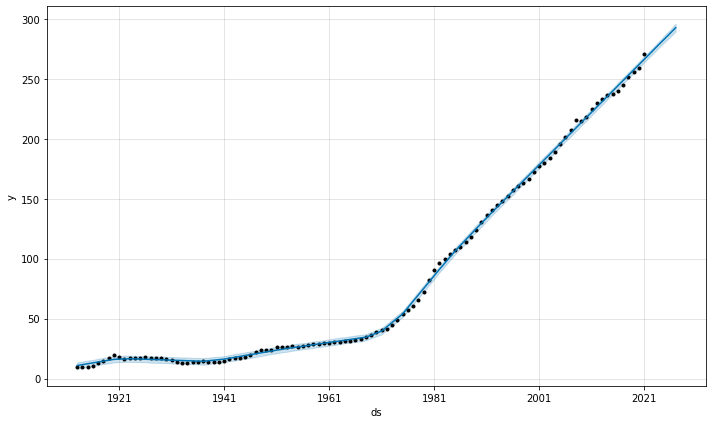

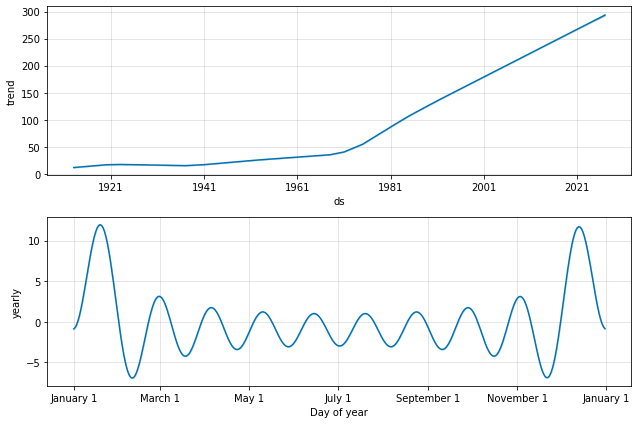

In [ ]:
series = df_cpi['Annual']
lag_plot(series)
pyplot.show()

df_model = df_cpi.copy()
df_model = df_model[['Year', 'Annual']]
df_model.rename(columns={"Year": "ds", "Annual": "y"},inplace=True)
df_model['ds']= pd.to_datetime(df_model['ds'],format='%Y')
# define the model
model = Prophet()
# fit the model
model.fit(df_model)


future = model.make_future_dataframe(periods= 5, freq= 'Y')
forcast = model.predict(future)
fig = model.plot(forcast)
fig.show()
fig = model.plot_components(forcast)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c5ceaca9-e365-4132-a867-b543164c96b0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>